    -   ROC (Reciever operating characsteristic) - Likelihood bend
    -   AUC (Area under curve) - proportion of distinctness

    -    1,0,1,1,0,0
    -    0.56263,0.47589,0.25639
    -    if the value exceeds 0.5 - 1
    -    if the value less than 0.5 - 0

    -  prediction  -                0.56263,0.47589,0.25639,0.15263,0.85263,0.78524
    -  without a thresold    -      1   ,   0    ,  0    ,      0    ,  1    ,  1
    -  with a thresold of 0.4 -     1   ,   1    ,  0      ,    0    ,  1    ,  1
    -  with a thresold of 0.7 -     0   ,   0    ,  0      ,    0    ,  1    ,  1

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

data = pd.DataFrame({
    'age':[30,20,45,62,14,54,56,71,25,63,49,85,74,16,19,18,25,56,45,25],
    'bp':[130,120,145,162,114,154,156,171,125,163,149,185,174,116,119,118,125,156,145,125],
    'cholestrol':[230,220,245,262,214,254,256,271,225,263,249,285,274,216,219,218,225,256,245,225],
    'label':[1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,1,1]
})

xtrain,xtest,ytrain,ytest = train_test_split(data[['age','bp','cholestrol']],data['label'],test_size = 0.2, random_state = 42)

clf = LogisticRegression(random_state = 42)
clf.fit(xtrain,ytrain)

ypred = clf.predict(xtest)

In [2]:
ytest

0     1
17    1
15    0
1     0
Name: label, dtype: int64

In [3]:
ypred

array([1, 1, 1, 1], dtype=int64)

In [4]:
ypred = np.array(ypred)
ytest = np.array(ytest)

In [5]:
ypred_prob = clf.predict_proba(xtest)[::,1]
fpr,tpr,_ = metrics.roc_curve(ytest,ypred_prob)

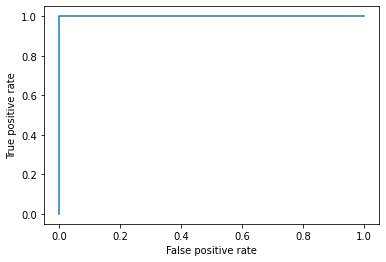

In [6]:
plt.plot(fpr,tpr)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

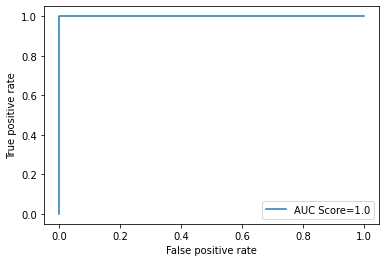

In [10]:
auc = metrics.roc_auc_score(ytest,ypred_prob)
plt.plot(fpr,tpr,label = "AUC Score="+str(auc))
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend(loc=4)
plt.show()